# CVM

Some example code to show how to use the CVM library.

If you want to play with the code, please make a copy

In [1]:
%matplotlib inline

from cvm.cascade import CascadeSVM, DynamicCascadeSVM
from cvm.svm import L1SVM, ElasticSVM
from cvm.data import spiral_data, linear_data, circle_data
from cvm.kernel import rbf_kernel, poly_kernel
from cvm.plot import plot_2d_model

In [2]:
from sklearn import svm

# Data generation

In [3]:
## set parameters

# samples in training and test set
n = 1000
n_test = 5000

# noise level
sigma = 0.1

# paramter for nuSVM
nu = 0.5
# paramter for Gaussian kernel
gamma = 0.05

# data generator
data_generator = linear_data

## generate data
train = data_generator(n, sigma)
test = data_generator(n_test, sigma)

# Grab the numpy arrays
X = train[['x1', 'x2']].values
y = train['y'].values
X_test = test[['x1', 'x2']].values
y_test = test['y'].values

# Models

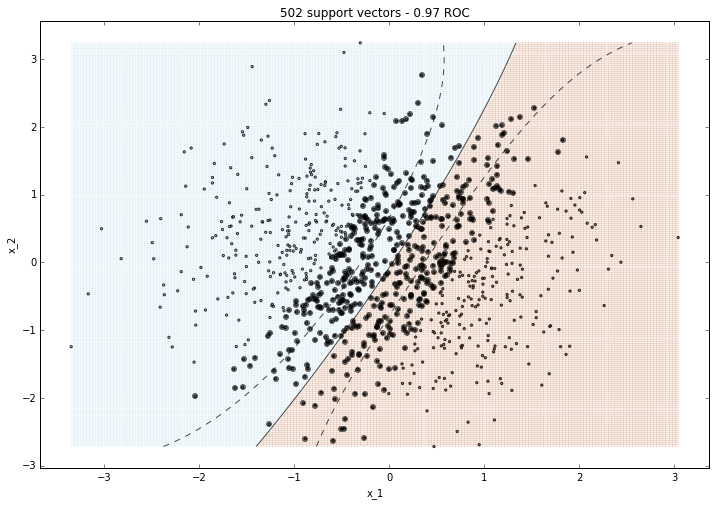

In [17]:
nu = 0.5
gamma = 0.1

svm_model = svm.NuSVC(nu, gamma=gamma)
plot_2d_model(svm_model, X, y, X_test=X_test, y_test=y_test)

split: 1 	 n = 1000
split: 2 	 n = 500
split: 3 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 128 observations at level 2
split: 6 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 129 observations at level 2
fitting svm with 131 observations at level 1
split: 9 	 n = 500
split: 10 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 129 observations at level 2
split: 13 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 129 observations at level 2
fitting svm with 132 observations at level 1
fitting svm with 137 observations at level 0


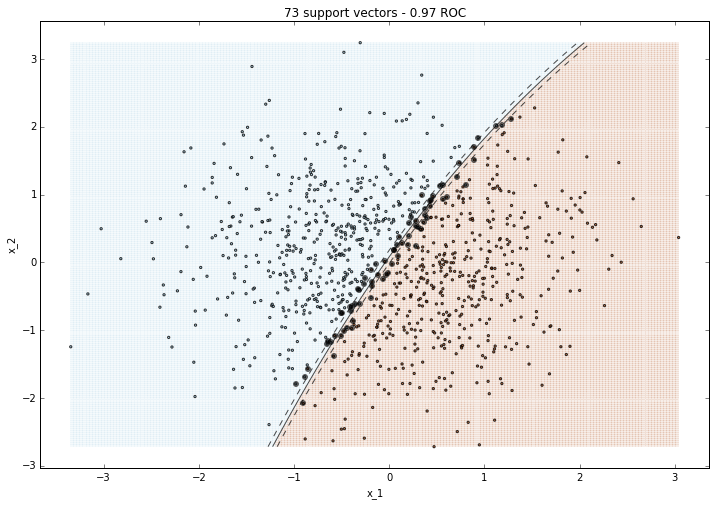

In [24]:
nu = 0.5
gamma = 0.01

base_model = lambda : svm.NuSVC(nu, gamma=gamma)
cascade_model = CascadeSVM(base_model, nx=250)

plot_2d_model(cascade_model, X, y, X_test=X_test, y_test=y_test)

split: 1 	 n = 1000
split: 2 	 n = 500
split: 3 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 28 observations at level 2
split: 6 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 35 observations at level 2
fitting svm with 55 observations at level 1
split: 9 	 n = 500
split: 10 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 31 observations at level 2
split: 13 	 n = 250
fitting svm with 125 observations at level 3
fitting svm with 125 observations at level 3
fitting svm with 32 observations at level 2
fitting svm with 55 observations at level 1
fitting svm with 110 observations at level 0
split: 16 	 n = 1000
split: 17 	 n = 500
split: 18 	 n = 250
fitting svm with 235 observations at level 3
fitting svm with 235 observations at level 3
fitting svm with 95 observations at level 2


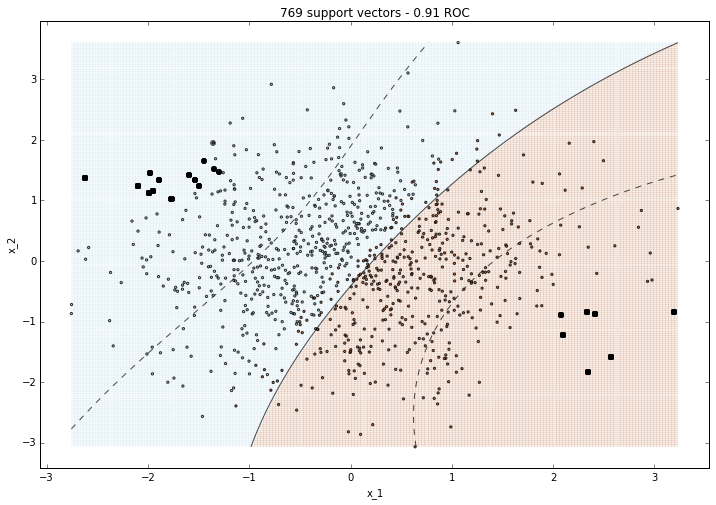

In [5]:
nu = 0.5
gamma = 0.01
reg = 0.001
alpha = 0.5

kernel = lambda X, Y: rbf_kernel(X, Y, gamma=gamma)
# kernel = lambda X, Y: poly_kernel(X, Y, degree=2)

base_model = lambda : ElasticSVM(kernel, reg=reg)
cascade_model = DynamicCascadeSVM(base_model, nx=250, n_iter=3)

plot_2d_model(cascade_model, X, y, X_test=X_test, y_test=y_test)

In [9]:
len(cascade_model.support_vectors_)

769

In [26]:
cascade_model.model.support_

array([  1,   2,   4,   5,   6,   8,   9,  10,  12,  13,  16,  17,  18,
        20,  21,  22,  26,  29,  30,  70,  71,  75,  79,  84,  85,  86,
        88,  89,  91,  92,  93,  94,  95,  98,  99, 100, 102,  34,  40,
        41,  43,  45,  46,  47,  48,  49,  50,  51,  53,  55,  56,  58,
        59,  60,  63, 103, 104, 105, 107, 108, 109, 114, 115, 116, 119,
       120, 126, 128, 129, 131, 132, 135, 136], dtype=int32)

In [27]:
y[[]]

array([], dtype=float64)